In [3]:
#Calling for libraries and setting style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style("darkgrid")
%matplotlib inline

In [4]:
#Loading and showing dataset
data = pd.read_excel("data.xlsx")
data.head()

,Nro,B/L Nro,Shipping Date,Vessel,Export Destination,Cubic Meters,Metric Tons,MMBtu,MPC,Marker,Marker Vaule,Reference Value,Price Use,Unit Regalia,Status
0,612,2021-PLNG-04,2021-01-24,Sestao Knutsen,"-, Corea del Sur",135591.405,61126.097,3149768,2945207,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933,1
1,611,2021-PLNG-03,2021-01-19,Murex,"-, Japón",170593.119,76892.972,3960237,3703040,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933,1
2,610,2021-PLNG-02,2021-01-12,Myrina,"-, Japón",169005.760,76096.703,3920337,3668050,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724,1
3,609,2021-PLNG-01,2021-01-08,PAN AMERICAS,"-, Japón",159733.776,71918.376,3705058,3466625,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724,1
4,608,2020-PLNG-54,2020-12-31,Valencia Knutsen,"-, Corea del Sur",170084.154,76561.171,3944476,3691823,LNG JAPAN/KOREA,12.2577,12.2577,4.969,1.8882,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 15 columns):
Nro                   635 non-null int64
B/L Nro               635 non-null object
Shipping Date         635 non-null datetime64[ns]
Vessel                635 non-null object
Export Destination    635 non-null object
Cubic Meters          635 non-null float64
Metric Tons           635 non-null float64
MMBtu                 635 non-null int64
MPC                   635 non-null int64
Marker                635 non-null object
Marker Vaule          635 non-null float64
Reference Value       635 non-null float64
Price Use             635 non-null float64
Unit Regalia          635 non-null float64
Status                635 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 74.5+ KB


In [8]:
data.describe()

,Nro,Cubic Meters,Metric Tons,MMBtu,MPC,Marker Vaule,Reference Value,Price Use,Unit Regalia,Status
count,635.000000,635.000000,635.000000,6.350000e+02,6.350000e+02,635.000000,635.000000,635.000000,635.000000,635.000000
mean,302.077165,148018.343180,66749.741865,3.441182e+06,3.212250e+06,6.817608,6.703663,1.880283,0.704999,2.911811
std,176.929887,28593.387993,12908.610367,6.658733e+05,6.198808e+05,4.110779,3.189773,1.659765,0.640453,0.374801
min,1.000000,1605.952000,724.064000,3.729000e+04,3.482000e+04,0.000000,1.906000,0.200000,0.060000,1.000000
25%,149.500000,135721.893500,61146.675500,3.150778e+06,2.947684e+06,3.662500,4.375000,0.570000,0.189700,3.000000
50%,299.000000,152319.546000,68650.049000,3.539066e+06,3.309728e+06,5.889400,6.260700,1.477000,0.543400,3.000000
75%,455.500000,169382.088000,76428.684000,3.941252e+06,3.670720e+06,8.983450,8.655100,2.821500,1.072150,3.000000
max,612.000000,171124.128000,77622.968000,3.998033e+06,3.724478e+06,24.964400,24.964400,12.822000,4.872400,3.000000


In [334]:
#Selecting columns and changing their names  
data = data[['Shipping Date', 'Vessel', 'Export Destination','Cubic Meters', 'Metric Tons', 'Marker', 'Marker Vaule', 'Reference Value', 'Price Use', 'Unit Regalia']]
data.columns = ['Date', 'Vessel', 'Destination','Sm3', 'tons', 'marker', 'marker_vaule','reference_value', 'price_use', 'unit_regalia']
data.head()

,Date,Vessel,Destination,Sm3,tons,marker,marker_vaule,reference_value,price_use,unit_regalia
0,2021-01-24,Sestao Knutsen,"-, Corea del Sur",135591.405,61126.097,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933
1,2021-01-19,Murex,"-, Japón",170593.119,76892.972,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933
2,2021-01-12,Myrina,"-, Japón",169005.760,76096.703,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724
3,2021-01-08,PAN AMERICAS,"-, Japón",159733.776,71918.376,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724
4,2020-12-31,Valencia Knutsen,"-, Corea del Sur",170084.154,76561.171,LNG JAPAN/KOREA,12.2577,12.2577,4.969,1.8882


In [335]:
data.Destination=data.Destination.str.split(", ",expand=True)[1]


In [336]:
data.Destination.unique()

array(['Corea del Sur', 'Japón', 'China', 'Holanda', 'Francia', 'España',
       'México', 'Inglaterra', 'Taiwán', 'Tailandia', 'Australia',
       'Egipto', 'Malta', 'Japon', 'Mexico', 'Argentina', 'Taiwan',
       'HAZIRA', 'Italia', 'Kuwait', 'Brasil', 'India', 'Israel', None,
       'Belgica', 'Reino Unido', 'Canadá'], dtype=object)

In [337]:

data = data.replace({"HAZIRA": "India", "Malta":"España", "Japon": "Japón", "Mexico": "México", "Taiwan":"Taiwán" })

In [338]:
data.head()

,Date,Vessel,Destination,Sm3,tons,marker,marker_vaule,reference_value,price_use,unit_regalia
0,2021-01-24,Sestao Knutsen,Corea del Sur,135591.405,61126.097,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933
1,2021-01-19,Murex,Japón,170593.119,76892.972,LNG JAPAN/KOREA,8.8715,8.8715,2.877,1.0933
2,2021-01-12,Myrina,Japón,169005.760,76096.703,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724
3,2021-01-08,PAN AMERICAS,Japón,159733.776,71918.376,LNG JAPAN/KOREA,24.9644,24.9644,12.822,4.8724
4,2020-12-31,Valencia Knutsen,Corea del Sur,170084.154,76561.171,LNG JAPAN/KOREA,12.2577,12.2577,4.969,1.8882


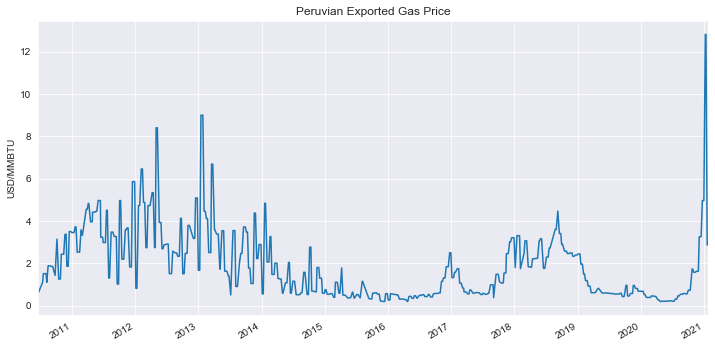

In [339]:
#Simple lineplot setting date column as index
plt.subplots(figsize = (12,6))
fig=data.set_index("Date")["price_use"].plot()
fig.set(xlabel="", ylabel = "USD/MMBTU", title="Peruvian Exported Gas Price")
plt.show()

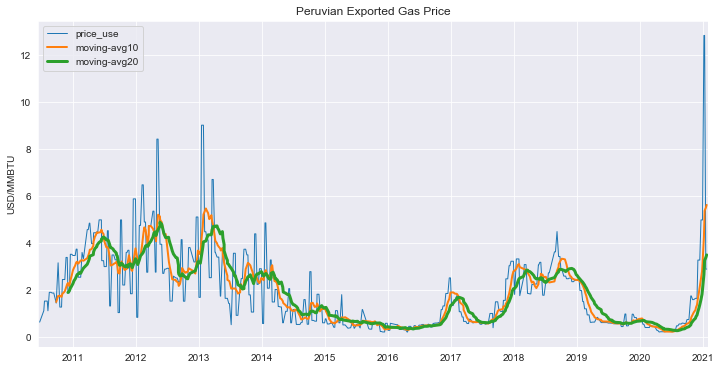

In [340]:
#Plotting moving average lines
plt.subplots(figsize = (12,6))
data2=data.set_index("Date").sort_index()
data2["moving-avg10"] = data2["price_use"].rolling(10).mean()
data2["moving-avg20"] = data2["price_use"].rolling(20).mean()
data2[["price_use", "moving-avg10", "moving-avg20"]]
plt.plot(data2.index, data2["price_use"], lw=1)
plt.plot(data2.index, data2["moving-avg10"], lw=2)
plt.plot(data2.index, data2["moving-avg20"], lw=3)
plt.xlabel("")
plt.ylabel("USD/MMBTU")
plt.title("Peruvian Exported Gas Price") 
plt.legend(['price_use', 'moving-avg10', 'moving-avg20'], loc='upper left')
plt.xlim(datetime.date(2010, 6, 15), datetime.date(2021, 2, 1))
plt.show()

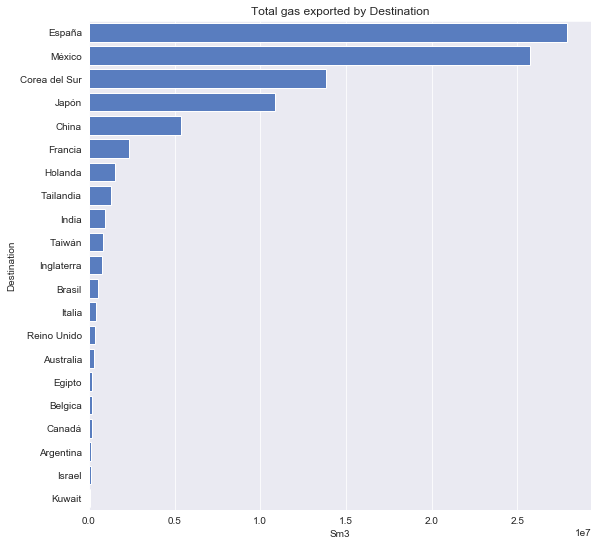

In [341]:
#Grouping data by Destination based on total gas exported and average price
data_destination = data[['Destination','Sm3', 'tons', 'price_use']].groupby("Destination").agg({
    'Sm3':'sum',
    'tons':'sum',
    'price_use':'mean'
}).reset_index().sort_values('Sm3', ascending=False)
plt.subplots(figsize = (9,9))
sns.set_color_codes('muted')
fig=sns.barplot(y = 'Destination', x = 'Sm3', data = data_destination, color = 'b',edgecolor = 'w')
fig.set_title('Total gas exported by Destination')
plt.show()

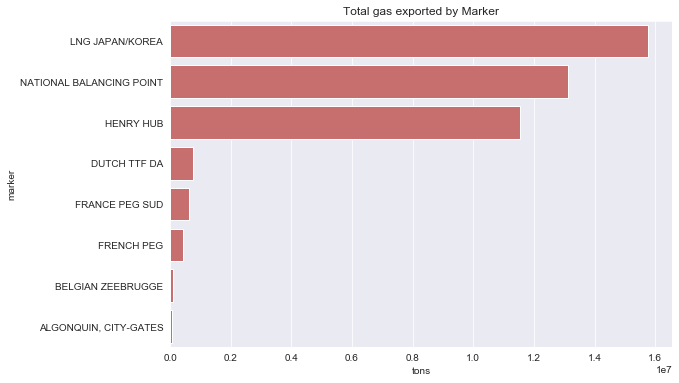

In [342]:
#Grouping data by Marker based on total gas exported and average price
data_bymarker= data[['marker','tons','price_use']].groupby("marker").agg({
    'tons':'sum',
    'price_use':'mean'
}).reset_index().sort_values('tons', ascending=False)
f, ax = plt.subplots(figsize = (9,6))
sns.set_color_codes('muted')
fig=sns.barplot(y = 'marker', x = 'tons', data = data_bymarker, color = 'r')
fig.set_title('Total gas exported by Marker')
plt.show()

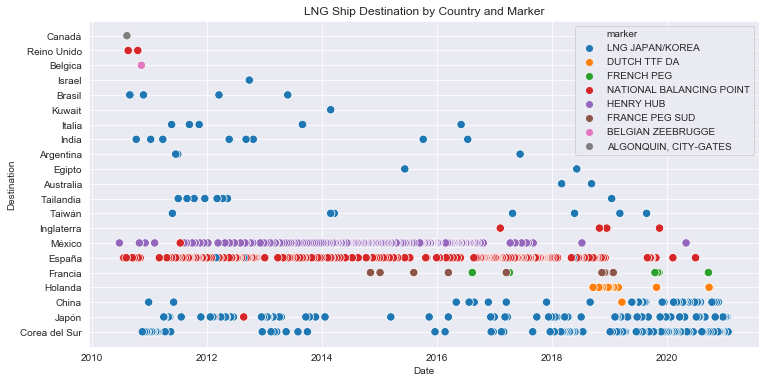

In [343]:
#Grouping data by Marker based on total gas exported and average price
f, ax = plt.subplots(figsize = (12,6))
fig=sns.scatterplot(x="Date", y="Destination", data=data, hue="marker", s=70)
fig.set_title("LNG Ship Destination by Country and Marker")
plt.show()

In [344]:
# Extract day, month and year in new column in main dataset 
data["Day"]=pd.DatetimeIndex(data['Date']).day
data["Month"]=pd.DatetimeIndex(data['Date']).month
data["Year"]=pd.DatetimeIndex(data['Date']).year

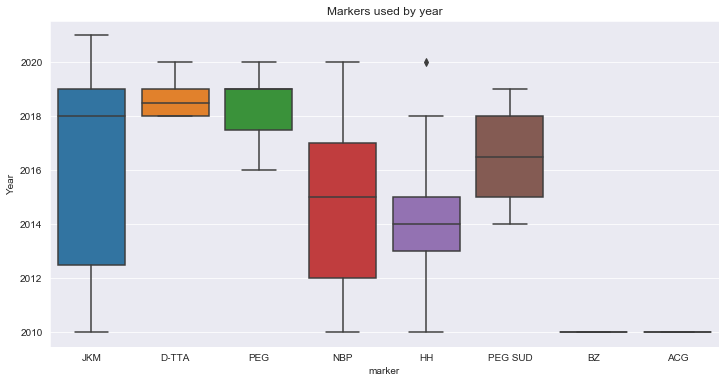

In [363]:
#Assigning new abbreviations for marker and plotting them by different year
f, ax = plt.subplots(figsize = (12,6))
data = data.replace({'LNG JAPAN/KOREA':'JKM', 'DUTCH TTF DA':"D-TTA", 'FRENCH PEG':'PEG', 
       'NATIONAL BALANCING POINT':'NBP', 'HENRY HUB':'HH', 'FRANCE PEG SUD':'PEG SUD',
       'BELGIAN ZEEBRUGGE':'BZ', 'ALGONQUIN, CITY-GATES':'ACG' })
fig=sns.boxplot(y="Year", x="marker", data=data)
fig.set_title("Markers used by year")
plt.show()

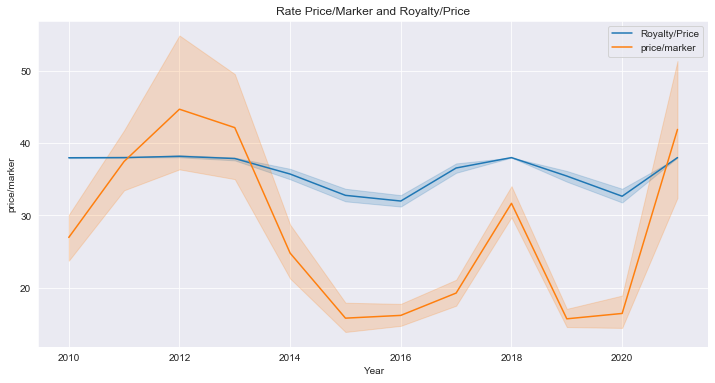

In [365]:
#Looking for relationship between Royalties, Price and Marker
f, ax = plt.subplots(figsize = (12,6))
data["Royalty/Price"] = 100*data["unit_regalia"]/data["price_use"]
data["price/marker"] = 100*data["price_use"]/data["marker_vaule"]
data=data.replace([np.inf, -np.inf], np.nan).dropna(how="all")
fig=sns.lineplot(x="Year", y="Royalty/Price", data=data, legend='brief', label="Royalty/Price")
fig=sns.lineplot(x="Year", y="price/marker", data=data, legend='brief', label="price/marker")
fig.set_title("Rate Price/Marker and Royalty/Price")
plt.show()

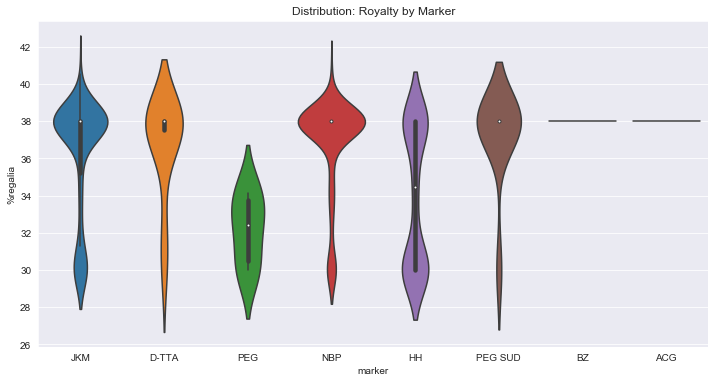

In [371]:
#Plotting distribution of markers by royalties
f, ax = plt.subplots(figsize = (12,6))
fig=sns.violinplot(x="marker", y="%regalia", data=data)
fig.set_title("Distribution: Royalty by Marker")
plt.show()